In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
P = np.linspace(0, 1, 21)

In [3]:
aprior = np.ones_like(P)

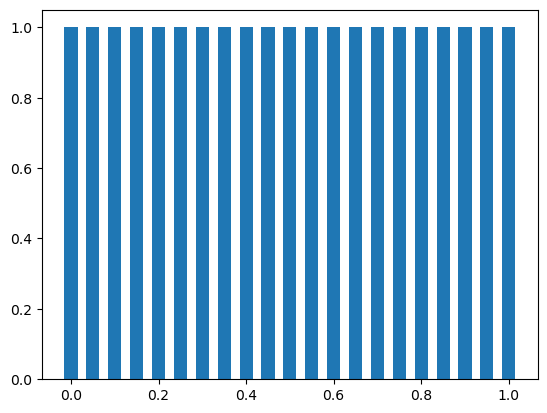

In [7]:
plt.bar(P, aprior, 0.03);

In [8]:
likelihood_head = P

<BarContainer object of 21 artists>

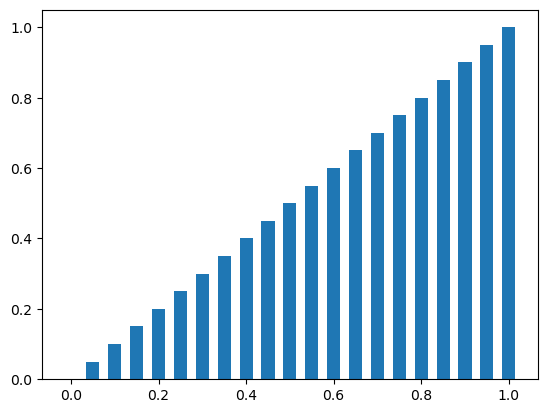

In [14]:
plt.bar(P, likelihood_head, 0.03)

In [10]:
likelihood_tail = 1 - P

<BarContainer object of 21 artists>

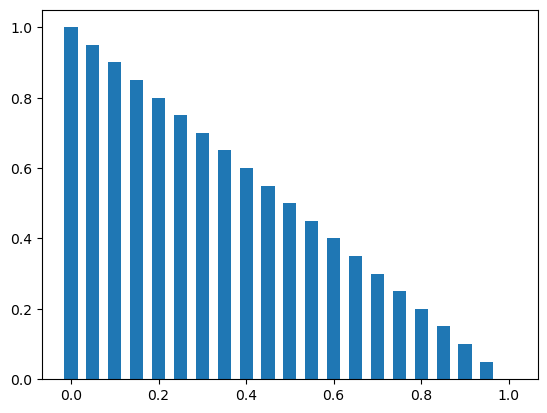

In [15]:
plt.bar(P, likelihood_tail, 0.03)

In [26]:
Data = [True, True, False, False, True, False, True, False]

In [33]:
posteriori = aprior.copy()

for d in Data[:3]:
    if d:
        posteriori *= likelihood_head
    else:
        posteriori *= likelihood_tail

<BarContainer object of 21 artists>

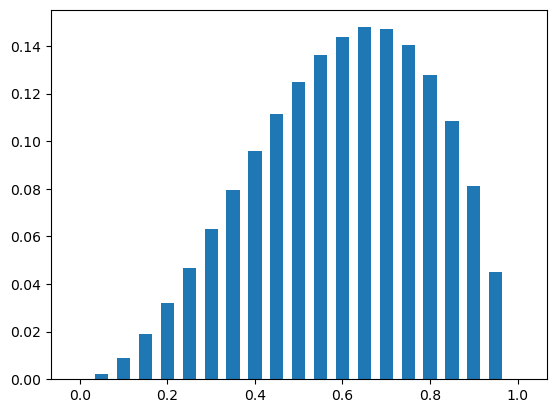

In [34]:
plt.bar(P, posteriori, 0.03)

In [73]:
a = 2
b = 3
sigma = 1
X = np.random.randn(10)
Y = a * X + b + np.random.randn(10) * sigma

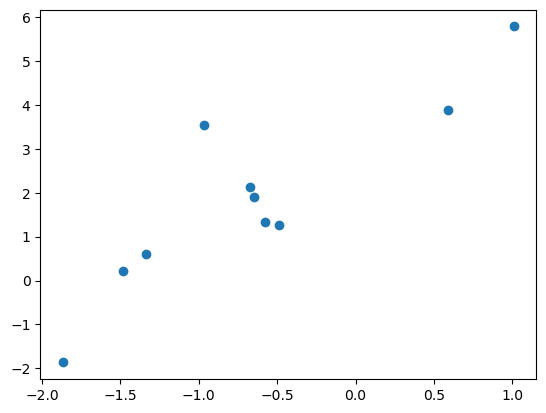

In [74]:
plt.plot(X, Y, "o");

In [75]:
A = np.linspace(-3, 7, 2001)
B = np.linspace(-2, 8, 2001)
AA, BB = np.meshgrid(A, B)

In [76]:
aprior = np.ones_like(AA)

In [77]:
def gauss(x, sigma):
    return 1 / np.sqrt(2*np.pi) * np.exp(-(x/sigma)**2/2)
    

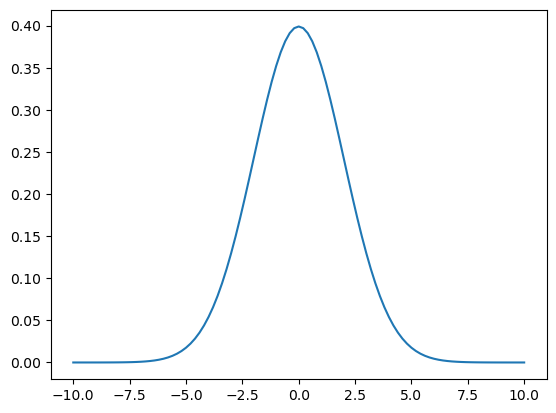

In [78]:
I = np.linspace(-10, 10, 101)
J = gauss(I, 2)
plt.plot(I, J)

In [79]:
def likelihood(a, b, x, y):
    y_hat = a * x + b
    r = y_hat - y
    p = gauss(r, sigma)
    return p

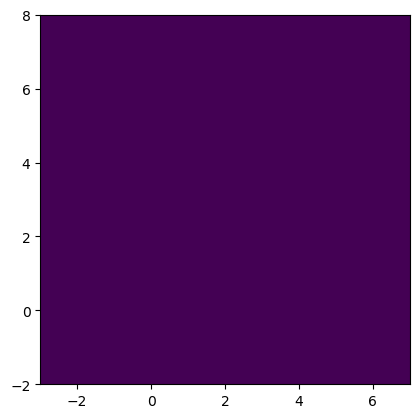

In [80]:
plt.imshow(aprior, extent=[-3, 7, -2, 8]);

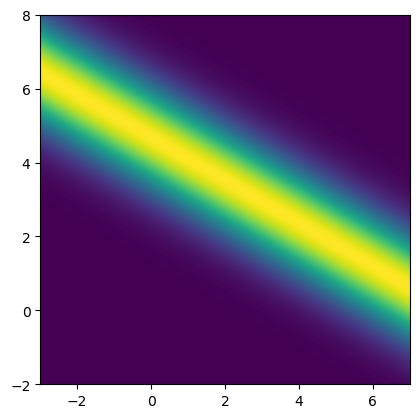

In [81]:
lh1 = likelihood(AA, BB, X[0], Y[0])
plt.imshow(lh1, extent=[-3, 7, -2, 8]);

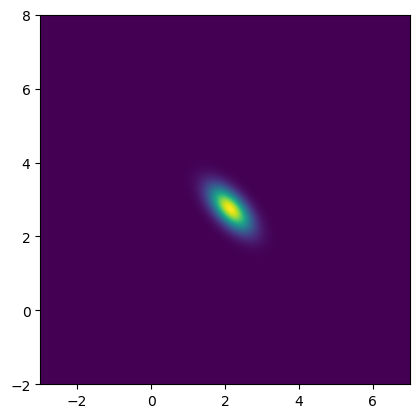

In [82]:
posteriori = aprior.copy()
for x, y in zip(X, Y):
    lh = likelihood(AA, BB, x, y)
    posteriori *= lh

plt.imshow(posteriori, extent=[-3, 7, -2, 8]);

In [83]:
posteriori.argmax()

2106080

In [84]:
21002 // 201, 21002 % 201

(104, 98)

In [85]:
-3 + (7+3)/201*98

1.8756218905472641

In [86]:
-2 + (8+2)/201*104

3.1741293532338313

In [87]:
A = np.vstack([X, np.ones_like(X)]).T

In [88]:
np.linalg.solve(A.T@A, A.T@Y)

array([2.1401272 , 3.26151728])